# Project-4 proposal level-2

# Unvelling the Android App Market: Analyzing Google play Store Data

### Description:
Clean, categorize, and visualize Google Play Store data to understand app market dynamics.Gain in-depth insights into the Android app market by leveraging data analytics, visualization,
and enhanced interpretation skills.

In [ ]:
Let's take a look at the data, which consists of two files:

>apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
>user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

## Data Analysis libraries

In [15]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv("Apps.csv")

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates(keep=False)

# Print the total number of apps
print('Total number of apps in the dataset = ', apps.shape[0])

# Have a look at a random sample of 5 rows
print(apps.sample(5))

Total number of apps in the dataset =  9659
      Unnamed: 0                   App       Category  Rating  Reviews  Size  \
5591        6616      BP Scanner Prank         FAMILY     4.1      157   7.0   
1980        2515                  AAFP        MEDICAL     3.8       63  24.0   
5036        6029         Live Radio BD         FAMILY     4.2       69   3.5   
337          373             Seznam.cz  COMMUNICATION     4.3    46702   NaN   
7793        8912  Weather Forecast Pro        WEATHER     4.7    14051   8.7   

        Installs  Type  Price Content Rating         Genres  \
5591     50,000+  Free      0       Everyone  Entertainment   
1980     10,000+  Free      0       Everyone        Medical   
5036     10,000+  Free      0       Everyone  Entertainment   
337   1,000,000+  Free      0       Everyone  Communication   
7793    100,000+  Paid  $3.99       Everyone        Weather   

            Last Updated         Current Ver         Android Ver  
5591  September 20, 2016     

## Data cleaning

In [16]:
# List of characters to remove
chars_to_remove = ["+",",","$"]
# List of column names to clean
cols_to_clean = ["Installs","Price"]

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ""))
        
# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


## Correcting data types

In [17]:
import numpy as np

# Convert Installs to float data type
apps["Installs"] = apps["Installs"].astype(float)

# Convert Price to float data type
apps["Price"] = apps["Price"].astype(float)

# Checking dtypes of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.0+ MB
None


## Exploring app categories

In [18]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps.Category.unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
# sorted_num_apps_in_category = sorted(num_apps_in_category,reverse=True)
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


## Distribution of app ratings

In [19]:
# Average rating of apps
avg_app_rating = apps.Rating.mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


## Size and price of an app

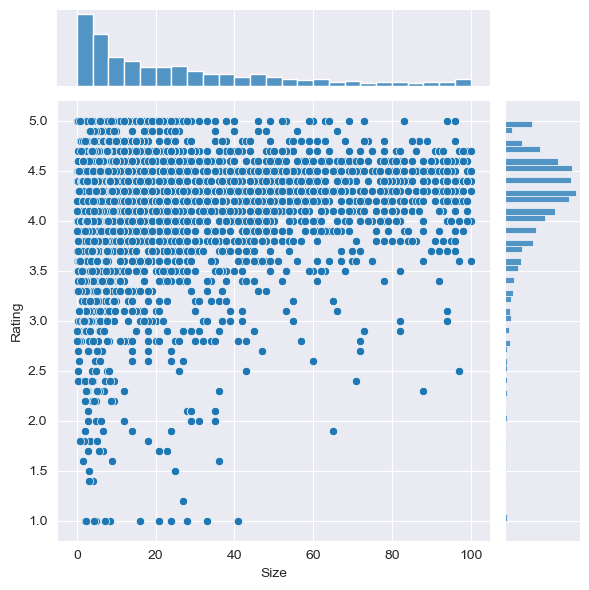

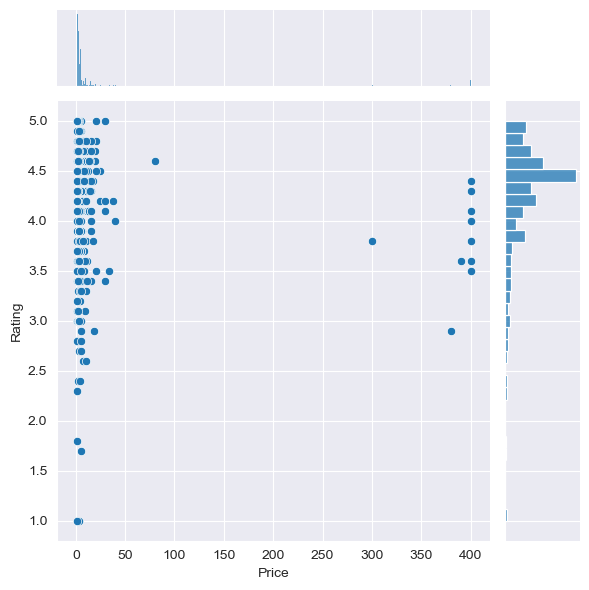

In [20]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']=='Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## Relation between app category and app price

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


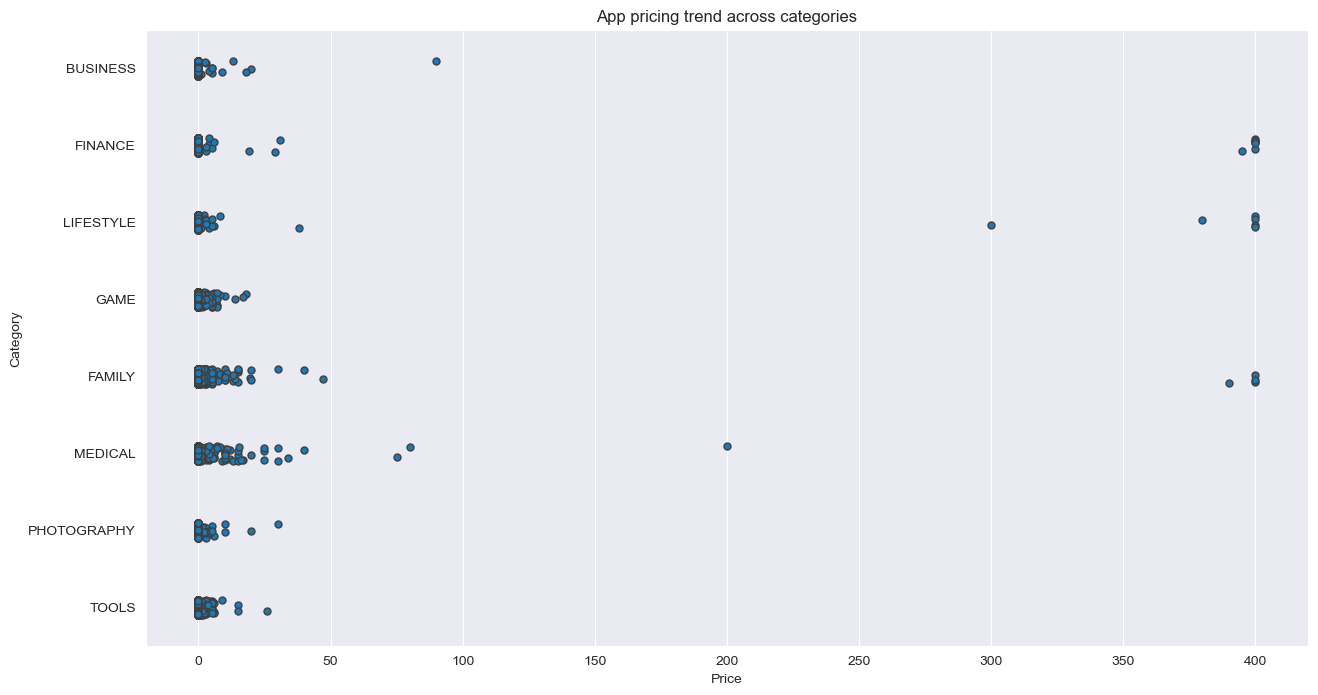

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps.Price>200]
apps_above_200[['Category', 'App', 'Price']]

## Filtering out "junk" apps

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

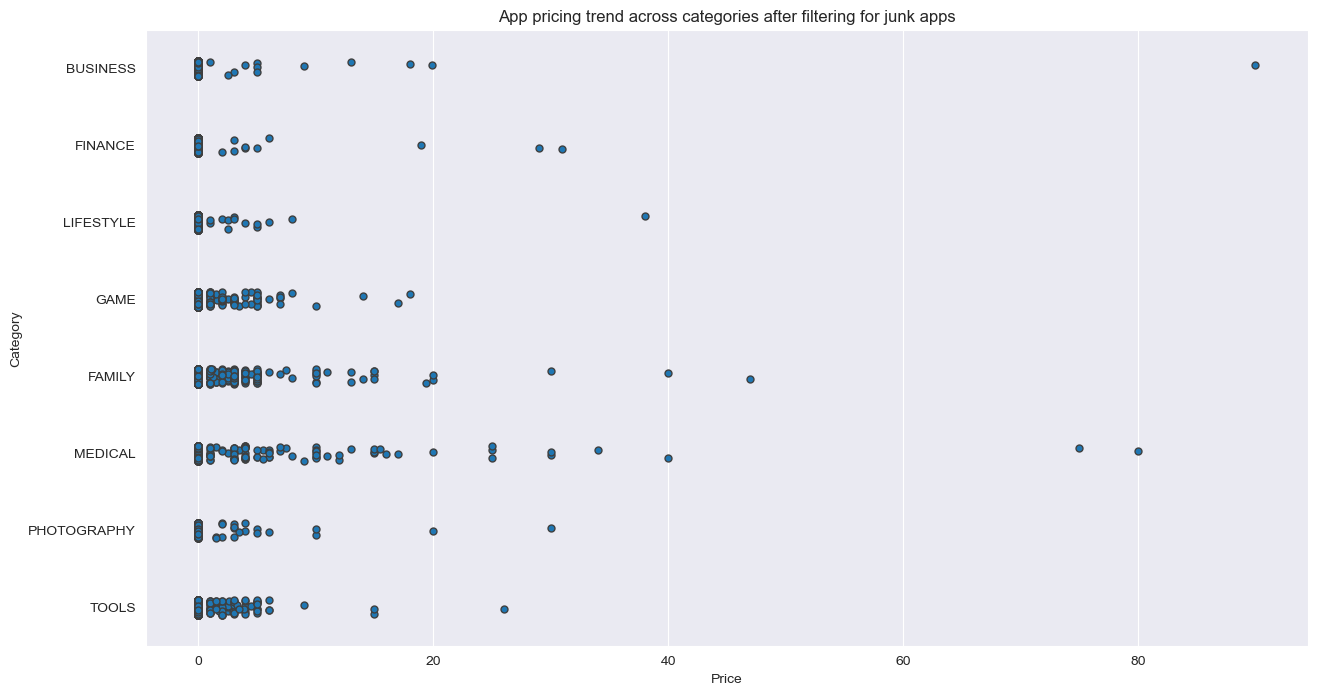

In [22]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats.Price<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = apps_under_100.Price, y = apps_under_100.Category, data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## Popularity of paid apps vs free apps

In [23]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## Sentiment analysis of user reviews

In [26]:
# Load user_reviews.csv
reviews_df = pd.read_csv("user_reviews.csv")


In [27]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [28]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [29]:
reviews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [31]:
# Join the two dataframes
merged_df = apps.merge(reviews_df)

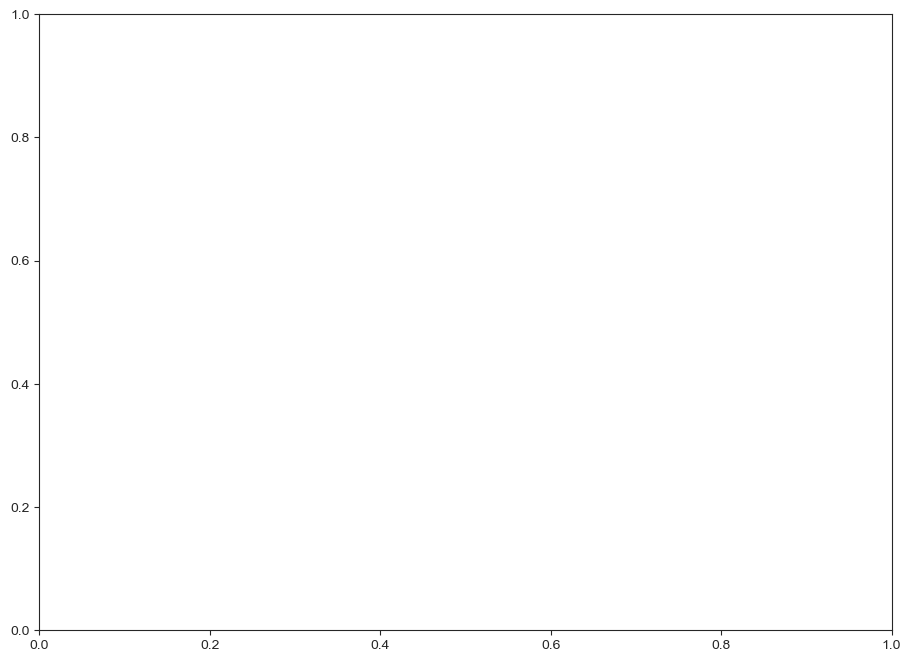

In [35]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)


In [36]:
# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = merged_df.Type, y = merged_df.Sentiment, data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

TypeError: Neither the `x` nor `y` variable appears to be numeric.